In [1]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.metrics import confusion_matrix

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

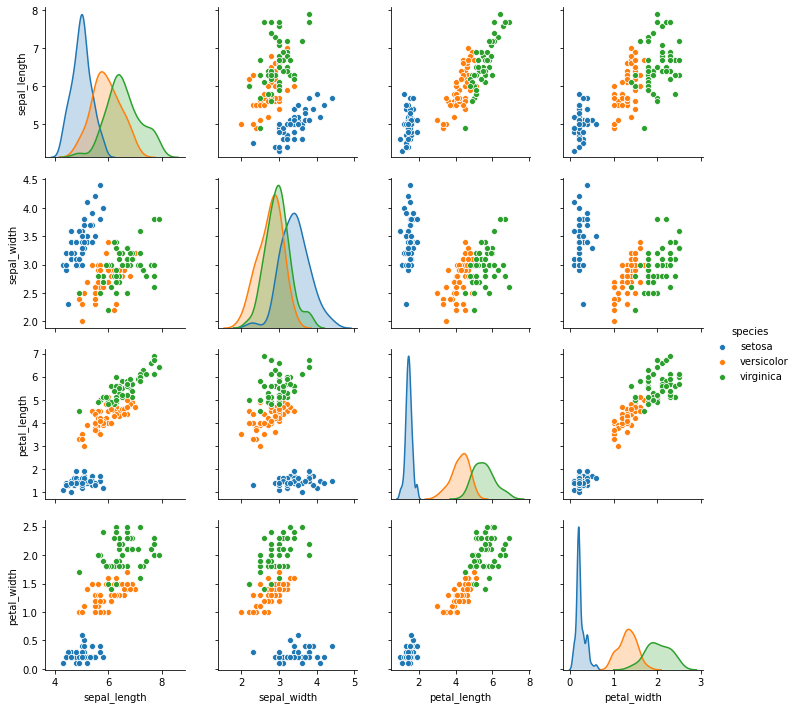

In [6]:
sns.pairplot(df,hue="species");

In [7]:
model = KMeans(n_clusters=3, random_state=170)
clusters = model.fit_predict(df.drop(['species'],axis = 1))
df['clusters'] = clusters

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [9]:
df.tail(20)

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
130,7.4,2.8,6.1,1.9,virginica,0
131,7.9,3.8,6.4,2.0,virginica,0
132,6.4,2.8,5.6,2.2,virginica,0
133,6.3,2.8,5.1,1.5,virginica,2
134,6.1,2.6,5.6,1.4,virginica,0
135,7.7,3.0,6.1,2.3,virginica,0
136,6.3,3.4,5.6,2.4,virginica,0
137,6.4,3.1,5.5,1.8,virginica,0
138,6.0,3.0,4.8,1.8,virginica,2
139,6.9,3.1,5.4,2.1,virginica,0


In [10]:
df.groupby("clusters").mean()

,sepal_length,sepal_width,petal_length,petal_width
clusters,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871


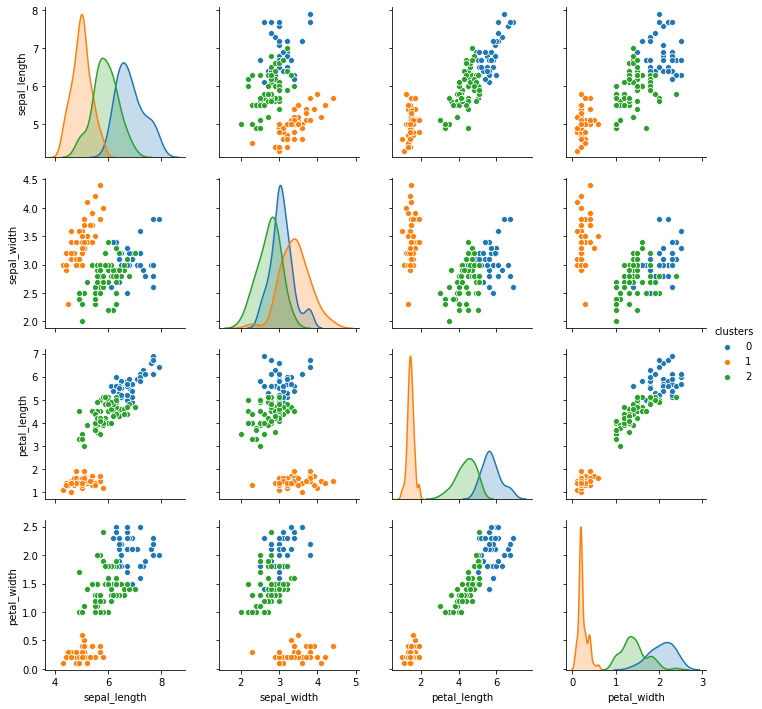

In [11]:
sns.pairplot(df,hue="clusters",vars=list(df.columns)[:-2])

In [12]:
pd.crosstab(df.species,df.clusters)

clusters,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


## GMMs (Gaussian Mixture Models)
In this approach we describe each cluster by its centroid (mean), covariance , and the size of the cluster(Weight).<br>
rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

In [13]:
from sklearn.mixture import GaussianMixture

df = sns.load_dataset('iris')
iris = df.drop(['species'],axis=1)
estimator = GaussianMixture(n_components=3, max_iter=20, random_state=0)
estimator.means_init = np.array([iris[df.species == i].mean(axis=0) for i in ["setosa","versicolor","virginica"]])
pred = estimator.fit_predict(iris)


In [14]:
iris[df.species == 'setosa'].mean(axis=0)

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

In [15]:
pd.crosstab(df.species,pred)

col_0,0,1,2
species,,,
setosa,50,0,0
versicolor,0,45,5
virginica,0,0,50


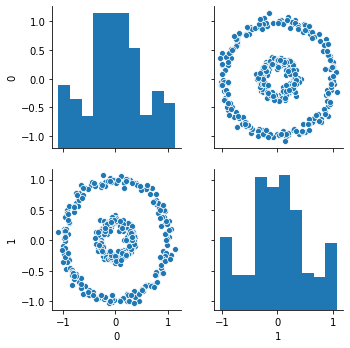

In [16]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=400, factor=.3, noise=.05,random_state=42)
circle = pd.DataFrame(X)
sns.pairplot(circle)

In [17]:
circle.head()

,0,1
0,0.261024,0.122538
1,-0.245087,0.202270
2,0.489471,0.882643
3,0.368505,0.055743
4,-0.981276,0.193832


In [18]:
clusters = KMeans(n_clusters=2, random_state=170).fit_predict(circle)
circle["clusters"] = clusters

In [19]:
circle.head()

,0,1,clusters
0,0.261024,0.122538,1
1,-0.245087,0.202270,0
2,0.489471,0.882643,1
3,0.368505,0.055743,1
4,-0.981276,0.193832,0


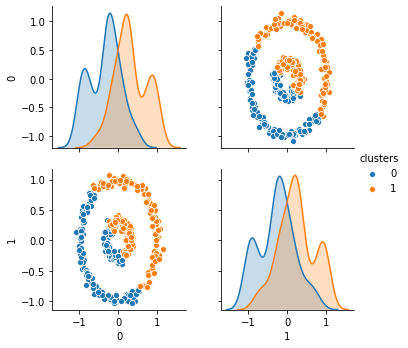

In [20]:
sns.pairplot(circle,hue="clusters",vars=list(circle.columns)[:-1])

# DBSCAN

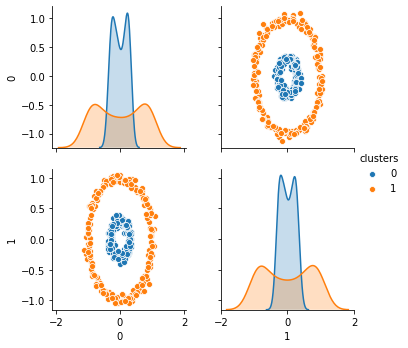

In [21]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=400, factor=.3, noise=.05,random_state=1)
circle = pd.DataFrame(X)
model = DBSCAN(eps=0.5,min_samples=20)
DB_clusters = model.fit_predict(circle)
circle["clusters"] = DB_clusters
sns.pairplot(circle,hue="clusters",vars=list(circle.columns)[:-1])